In [1]:
import pandas as pd
import pandasql as psql
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Настройка графиков
sns.set(
    font_scale=.8, 
    style='whitegrid', 
    rc={'figure.figsize': (5, 3)}
)

### Загрузка данных
ДФ с поездками на такси в Перу

In [3]:
path_to_file = 'taxi_peru.csv'
taxi = pd.read_csv(path_to_file, sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])

In [4]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [5]:
taxi.shape

(23111, 19)

- journey_id – уникальный id поездки
- user_id – id пользователя
- driver_id – id водителя
- taxi_id – id машины
- icon – тип поездки
- start_type – тип заказа (asap, reserved, delayed)
- start_at – время начала поездки
- start_lat – исходное местоположение пользователя, широта
- start_lon – исходное местоположение пользователя, долгота
- end_at – время окончания поездки
- end_lat – итоговое местоположение, широта
- end_lon – итоговое местоположение, долгота
- end_state – состояние заказа
- driver_start_lat – исходное местоположение водителя, широта
- driver_start_lon – исходное местоположение водителя, долгота
- arrived_at – время прибытия водителя
- source – платформа, с которой сделан заказ
- driver_score – оценка водителя клиентом
- rider_score – оценка клиента водителем

#### Преобразование данных

In [6]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

In [7]:
taxi.start_at = pd.to_datetime(taxi.start_at, yearfirst=True)
taxi.end_at = pd.to_datetime(taxi.end_at, yearfirst=True)
taxi.arrived_at = pd.to_datetime(taxi.arrived_at, yearfirst=True)

In [8]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

In [9]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

### Раскопки

_Статистика по источникам заказов в %_

In [10]:
taxi_source_orders = taxi.value_counts('source', normalize=True) * 100
taxi_source_orders.round(0)

source
iPhone     42.0
web        33.0
Android    21.0
iPad        2.0
Wap         1.0
dtype: float64

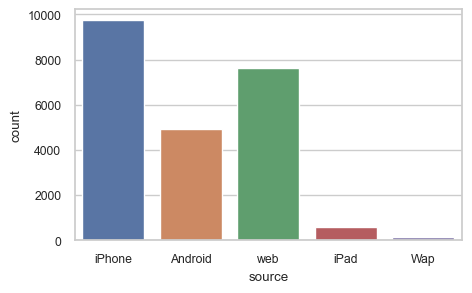

In [11]:
sns.countplot(data=taxi, x='source');

_Самый частый тип поездки_

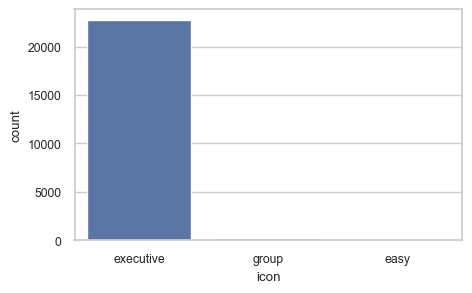

In [12]:
sns.countplot(data=taxi, x='icon');

_Статистика по окончанию поездки для различных платформ_

In [13]:
taxi_source_stats = (
    taxi
    .groupby(['source', 'end_state'], as_index=False).journey_id.count()
    .rename(columns={'journey_id': 'amount'})
)
taxi_source_stats.head()

,source,end_state,amount
0,Android,driver cancel,75
1,Android,drop off,3358
2,Android,failure,90
3,Android,no show,6
4,Android,not found,281


In [14]:
query = """
SELECT
    source,
    end_state,
    amount,
    SUM(amount) OVER (
        PARTITION BY source
    ) AS source_amount
FROM taxi_source_stats
"""
taxi_source_stats = (
    psql.sqldf(query)
    .sort_values('source_amount', ascending=False)
)
taxi_source_stats.head()

,source,end_state,amount,source_amount
21,iPhone,rider cancel,1480,9734
20,iPhone,not found,640,9734
19,iPhone,no show,5,9734
18,iPhone,failure,125,9734
17,iPhone,drop off,7383,9734


In [15]:
taxi_source_stats['percent'] = round(taxi_source_stats.amount / taxi_source_stats.source_amount * 100, 1)

In [16]:
taxi_source_stats.head()

,source,end_state,amount,source_amount,percent
21,iPhone,rider cancel,1480,9734,15.2
20,iPhone,not found,640,9734,6.6
19,iPhone,no show,5,9734,0.1
18,iPhone,failure,125,9734,1.3
17,iPhone,drop off,7383,9734,75.8


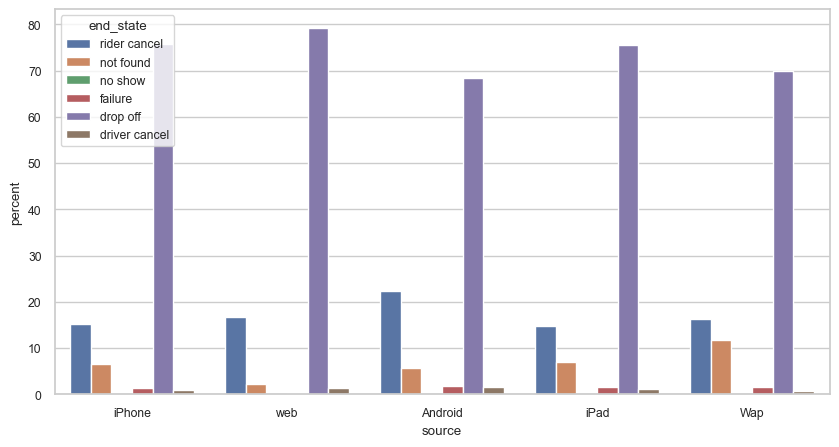

In [17]:
sns.set(
    font_scale=.8, 
    style='whitegrid',
    rc={'figure.figsize': (10, 5)}
)
sns.barplot(data=taxi_source_stats, x='source', y='percent', hue='end_state');

_Оценки водителей и пассажиров_  

Оценки водителей пассажирами

In [18]:
taxi.driver_score.unique()

array([ 5., nan,  4.,  0.,  2.,  1.,  3.])

In [19]:
driver_scores = (
    taxi
    .value_counts('driver_score', normalize=True)
    .mul(100).round(1)
    .to_frame().reset_index()
    .rename(columns={'driver_score': 'score', 0: 'percent'})
    .assign(reciever='driver')
)
driver_scores

,score,percent,reciever
0,5.0,58.8,driver
1,4.0,21.9,driver
2,0.0,14.3,driver
3,3.0,3.0,driver
4,1.0,1.2,driver
5,2.0,0.8,driver


Оценки пассажиров водителями

In [20]:
rider_scores = (
    taxi
    .value_counts('rider_score', normalize=True)
    .mul(100).round(1)
    .to_frame().reset_index()
    .rename(columns={'rider_score': 'score', 0: 'percent'})
    .assign(reciever='rider')
)
rider_scores

,score,percent,reciever
0,5.0,87.1,rider
1,4.0,8.8,rider
2,0.0,2.3,rider
3,3.0,1.4,rider
4,1.0,0.2,rider
5,2.0,0.2,rider


In [21]:
scores = pd.concat([driver_scores, rider_scores]).reset_index()
scores

,index,score,percent,reciever
0,0,5.0,58.8,driver
1,1,4.0,21.9,driver
2,2,0.0,14.3,driver
3,3,3.0,3.0,driver
4,4,1.0,1.2,driver
5,5,2.0,0.8,driver
6,0,5.0,87.1,rider
7,1,4.0,8.8,rider
8,2,0.0,2.3,rider
9,3,3.0,1.4,rider


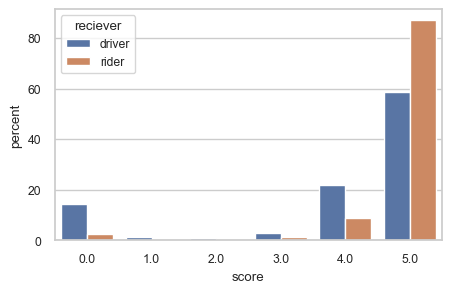

In [22]:
sns.set(
    font_scale=.8, 
    style='whitegrid', 
    rc={'figure.figsize': (5, 3)}
)
sns.barplot(data=scores, x='score', y='percent', hue='reciever');

Как можно заметить, пользователи более требовательны и ставят более низкие оценки, чем водители. Является ли это общим правилом для сфер предоставления услуг за плату?

_Время ожидания машины пассажиром_

In [23]:
taxi['wait_time'] = (taxi.arrived_at - taxi.start_at).astype('timedelta64[m]')
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0


_Водители с наибольшим временем опоздания_

In [24]:
taxi.query("(start_type == 'reserved') and (wait_time > 0.0)") \
    .groupby('driver_id', as_index=False) \
    .agg({'wait_time': 'count'}) \
    .rename(columns={'wait_time': 'delays_amount'}) \
    .sort_values('delays_amount', ascending=False)

,driver_id,delays_amount
24,406921adcca37705ef527b4246c0cfea,67
86,d665fb9f75ef5d9cd0fd89479380ba78,59
93,ec84a73745199ff840ecafcb924383ad,57
29,56f59b58bcbbd1cdabc3652e713134c2,51
77,c814db2127582cf95dea1f74f43127c2,45
...,...,...
88,d7bf644eb441cda6127f91addebb85c4,1
71,b68895736389f2949faa8c73555b81ac,1
51,8cb98e46b27af1e6fca8768a2a6329f3,1
16,389bfa333ba8fa7281dd5f0e1b57c0c1,1


_Статистика по месяцам и дням недели_

In [25]:
taxi['month'] = taxi.start_at.dt.strftime('%m').astype('int')
taxi['weekday'] = taxi.start_at.dt.strftime('%A')
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time,month,weekday
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,...,drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0,11,Tuesday
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,5,Monday
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,...,not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN,6,Tuesday
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,...,drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0,-5.0,9,Saturday


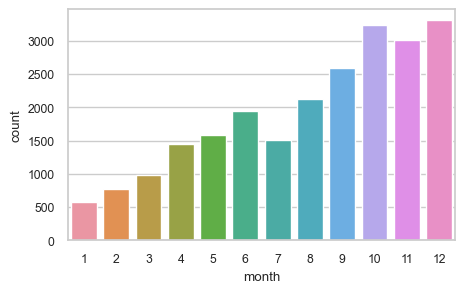

In [26]:
sns.countplot(data=taxi, x='month');

Можно заметить положительный тренд - с приближением к концу года количество поездок увеличивается  
Возможно, причиной является не специфика поведения пользователей, а нарастание популярности сервиса

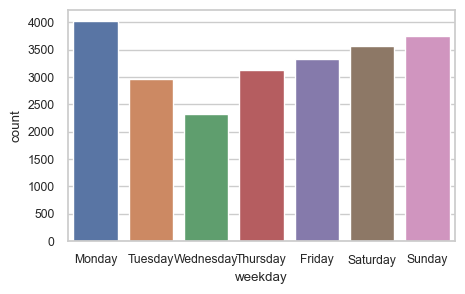

In [27]:
sns.countplot(
    data=taxi, x='weekday', 
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
);

Наибольшее число поездок наблюдается в понедельник

_Посмотрим на MAU_  
Активным будем считать уникального пользователя, воспользовавшегося сервисом

In [28]:
unique_users_per_month = (
    taxi
    .groupby('month', as_index=False)
    .agg({'user_id': pd.Series.nunique})
    .rename(columns={'user_id': 'mau'})
)

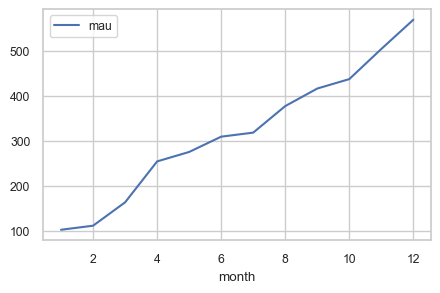

In [29]:
unique_users_per_month.plot.line(x='month', y='mau');

График свидетельствует о росте популярности сервиса

inspired by: KCM2L3&4